In [65]:
# Exemple d'utilisation
image_directory = r'extracted_images/y/'
image_height = 28  # Spécifiez la hauteur des images
image_width = 28  # Spécifiez la largeur des images

preprocessing = Preprocessing(image_directory, image_height, image_width)

# Utilisation du générateur de données pour alimenter le modèle
batch_size = 32
data_generator = preprocessing.generate_dataset(batch_size=batch_size)

In [68]:
from PIL import Image
import os

chemin_repertoire = r'extracted_images'

etiquettes = []
noms_caracteres = []

#Parcourir le répertoire contenant les dossiers de caractères
for dossier in os.listdir(chemin_repertoire):
    chemin_dossier = os.path.join(chemin_repertoire, dossier)

#Vérifier si le chemin est un répertoire
    if os.path.isdir(chemin_dossier):
        # Parcourir les fichiers du répertoire
        for fichier in os.listdir(chemin_dossier):
            chemin_fichier = os.path.join(chemin_dossier, fichier)

#Vérifier si le fichier est une image
            if fichier.endswith(".png") or fichier.endswith(".jpg") or fichier.endswith(".jpeg"):
                # Charger l'image avec Pillow
                image = Image.open(chemin_fichier)

#Ajouter l'étiquette et le nom du caractère
                etiquettes.append(dossier)
                noms_caracteres.append(chemin_fichier)

#Fermer l'image
                image.close()

#Afficher les étiquettes et noms des caractères correspondants
for etiquette, nom_caractere in zip(etiquettes, noms_caracteres):
    print("Étiquette :", etiquette)
    print("Nom du caractère :", nom_caractere)
    print()

Étiquette : y
Nom du caractère : extracted_images\y\exp1.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100027.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100046.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100049.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100065.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100068.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100072.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100104.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100109.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100113.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100134.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100148.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100170.jpg

Étiquette : y
Nom du caractère : extracted_images\y\exp100175.jpg

Éti

In [67]:
import matplotlib.pyplot as plt

# Sélectionner un exemple d'image à visualiser
image_index = 0

# Prétraiter l'image sélectionnée
preprocessed_image = preprocessing.preprocess_image(image_directory)

# Afficher l'image prétraitée
plt.imshow(preprocessed_image.squeeze(), cmap='gray')  # squeeze pour enlever la dimension d'extension
plt.axis('off')
plt.show()

PermissionError: [Errno 13] Permission denied: 'extracted_images/y'

In [36]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
gpus= tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
tf.config.experimental.list_physical_devices('GPU')

[]

# Extract

In [5]:
import cv2
import imghdr

In [20]:
data_dir= '..\\data\\extracted_images'
image_exts=['png','jpeg','jpg','bmp']

In [21]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exits:
                print('Image not in ext list {]'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image ..\data\extracted_images\y\exp1.jpg
Issue with image ..\data\extracted_images\y\exp100.jpg
Issue with image ..\data\extracted_images\y\exp100027.jpg
Issue with image ..\data\extracted_images\y\exp100046.jpg
Issue with image ..\data\extracted_images\y\exp100049.jpg
Issue with image ..\data\extracted_images\y\exp100065.jpg
Issue with image ..\data\extracted_images\y\exp100068.jpg
Issue with image ..\data\extracted_images\y\exp100072.jpg
Issue with image ..\data\extracted_images\y\exp100104.jpg
Issue with image ..\data\extracted_images\y\exp100109.jpg
Issue with image ..\data\extracted_images\y\exp100113.jpg
Issue with image ..\data\extracted_images\y\exp100134.jpg
Issue with image ..\data\extracted_images\y\exp100148.jpg
Issue with image ..\data\extracted_images\y\exp100170.jpg
Issue with image ..\data\extracted_images\y\exp100175.jpg
Issue with image ..\data\extracted_images\y\exp100179.jpg
Issue with image ..\data\extracted_images\y\exp100183.jpg
Issue with image ..\da

In [33]:
img= cv2.imread(os.path.join(data_dir,'y','exp100.jpg'))

In [29]:
os.path.join(data_dir,'y','exp1')

'..\\data\\extracted_images\\y\\exp1'

In [34]:
img.shape

(45, 45, 3)

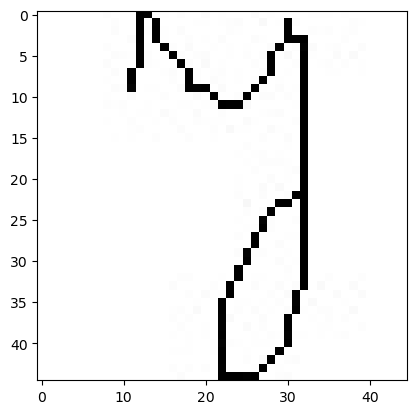

In [35]:
plt.imshow(img)

##  Data-pipeline

In [48]:
data= tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=20, image_size=(128,128))

Found 15210 files belonging to 2 classes.


In [49]:
data_iterator= data.as_numpy_iterator()

In [50]:
batch = data_iterator.next()

In [51]:
batch[0].shape

(20, 128, 128, 3)

In [52]:
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

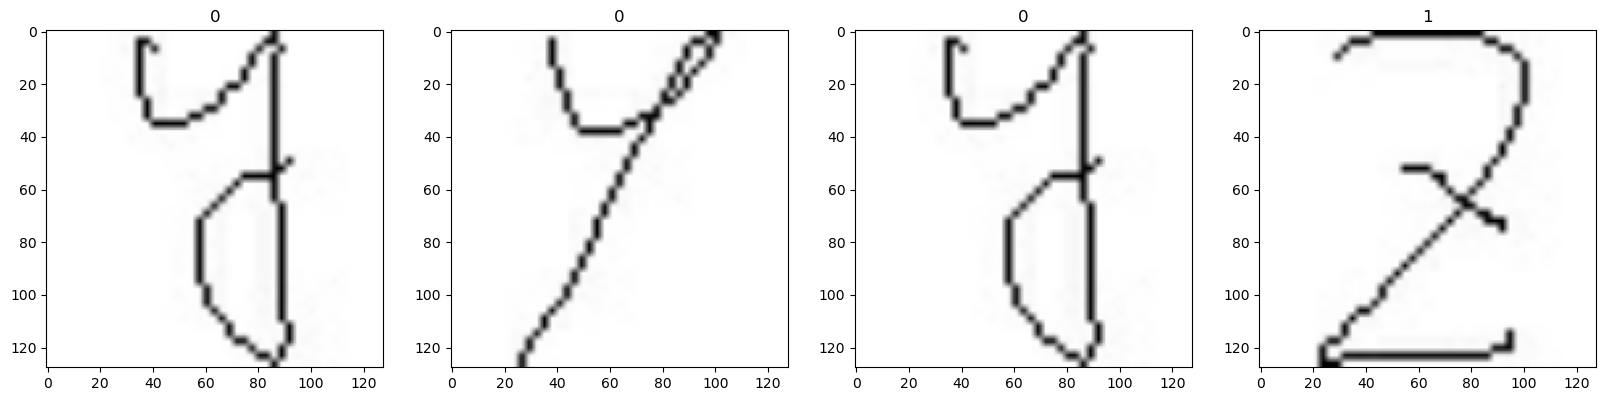

In [55]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing

In [56]:
data = data.map(lambda x,y : (x/255,y))

In [62]:
scaled_iterator =data.as_numpy_iterator()

In [64]:
scaled_iterator.next()[0].min()

0.0

In [65]:
batch = scaled_iterator.next()

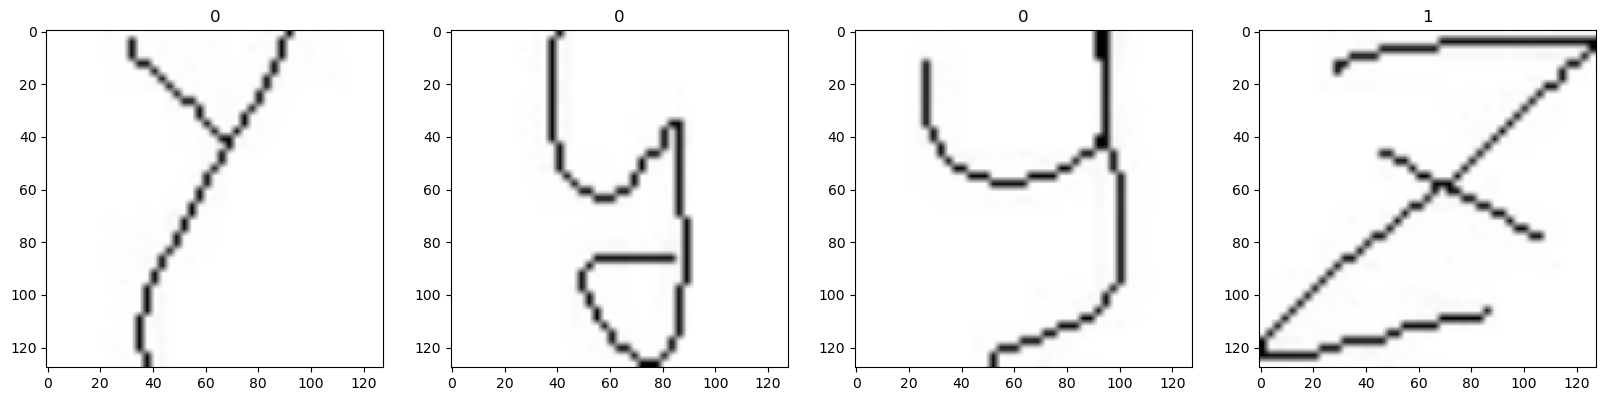

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Splitting data

In [75]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [77]:
train= data.take(train_size)
val= data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [82]:
len(val)

153

# Model

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = tf.keras.models.Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [101]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)      

In [103]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=0, monitor='val_loss')

In [104]:
logdir='logs'

In [105]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [106]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback,early_stopping])

Epoch 1/20
532/532 [==============================] - 72s 133ms/step - loss: 0.1254 - accuracy: 0.9517 - val_loss: 0.0269 - val_accuracy: 0.9895
Epoch 2/20
532/532 [==============================] - 69s 129ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0042 - val_accuracy: 0.9987


# Performance visualisation

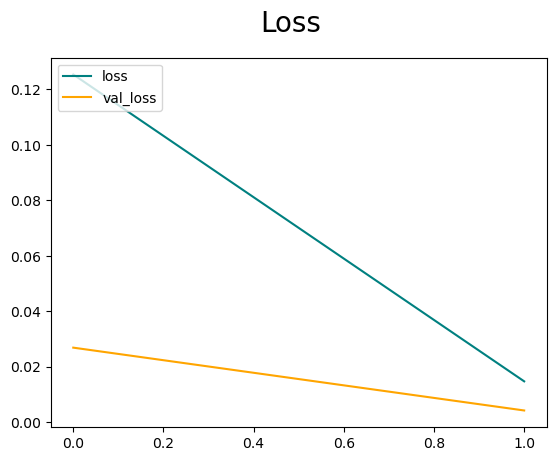

In [107]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

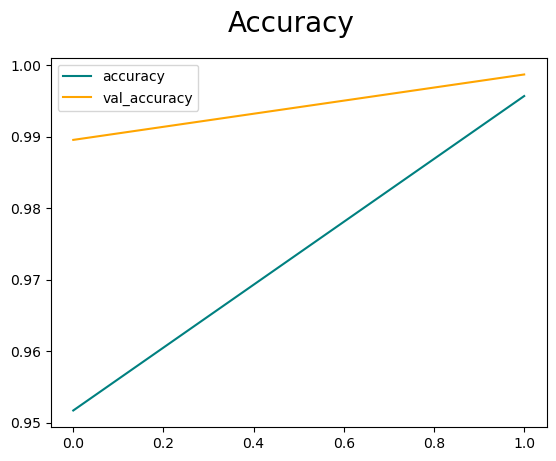

In [108]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [109]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [110]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [111]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 49ms/step


In [112]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9983022, shape=(), dtype=float32) tf.Tensor(0.99933773, shape=(), dtype=float32)


# Save the model

In [114]:
from tensorflow.keras.models import load_model

In [116]:
model.save(os.path.join('models','symbol_recognizer.h5'))

# Equation-Integral solving